# Gene Analysis Code Form - So You Can Analyze Gene Data, Too!

### Hello! Welcome to your code form for conducting your own gene analysis (sponsored by Team Jean Expression). Track our process in conducting our analysis of genes studied by the Blythe Lab and use our process to conduct your own analysis of your lab's genes, too! 
### Authors: Merrina Lan, Joseph Lee, Jaden Krol, Rivaan Kakkaramadam, Jacob Ingber, and Wade Patterson

## Let's begin:

In [2]:
#Import the following Python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Import Blythe Lab datasets on multilevel fold change, estrogenfold change, and dietfold change

blythelabmulti = pd.read_csv('multi-levelfold-change.hypothalamus.csv', index_col = 0)
blythelabestrogen = pd.read_csv('estrogenfold-change.hypothalamus.csv', index_col = 0)
blythelabdiet = pd.read_csv('dietfold-change.hypothalamus.csv', index_col = 0)

## Yay! Now Python has your data and the fun can begin! :)

# Setting Probability Thresholds:

### What probability of being differentially expressed do you want to make sure all the genes you focus on have? Let's apply that to your data!

## First let's apply that to your estrogen data. Let's show you how we did it with ours:

In [4]:
#Isolate Blythe Lab estrogenfold change data's fold change and probability columns

blythelabestrogen = pd.read_csv('estrogenfold-change.hypothalamus.csv',index_col=0)
blythelabestrogen = blythelabestrogen.drop(columns = ['name', 'description', 'gene_id'])
blythelabestrogenprobsort = blythelabestrogen.sort_values(by='H.ppde', ascending=False)
blythelabestrogenprobsortc = blythelabestrogenprobsort.dropna(subset=['H.fc','H.ppde'])

#Create 3 new csvs from Blythe Lab estrogenfold change data isolated by different probability thresholds:

#1. High interest = estrogenfold change data with at least 75% (or .75) probability of being expressed

highinterestestrogen = blythelabestrogenprobsortc[blythelabestrogenprobsortc['H.ppde'] >= 0.75]
highinterestestrogen.to_csv('estrogen_high_interest_genes.csv')

#2. Medium interest = estrogenfold change data with at least 67% (or .67) probability of being expressed

med = blythelabestrogenprobsortc[blythelabestrogenprobsortc['H.ppde'] >= 0.33]
medinterestestrogen = med[med['H.ppde'] < 0.67]
medinterestestrogen.to_csv('estrogen_med_interest_genes.csv')

#3. Low interest = estrogenfold change data with less than 33% (or .33) probability of being expressed

lowinterestestrogen = blythelabestrogenprobsortc[blythelabestrogenprobsortc['H.ppde'] < 0.33]
lowinterestestrogen.to_csv('estrogen_low_interest_genes.csv')

## See? Was that so hard? Let's do the same for your diet data as well:

## See what we did:

In [5]:
#Isolate Blythe Lab dietfold change data's fold change and probability columns

blythelabdiet = pd.read_csv('dietfold-change.hypothalamus.csv', index_col = 0)
blythelabdiet = blythelabdiet.drop(columns = ['name', 'description', 'gene_id'])
blythelabdietprobsort = blythelabdiet.sort_values(by='H.ppde', ascending=False)
blythelabdietprobsortc = blythelabdietprobsort.dropna(subset=['H.fc','H.ppde'])

#Create 3 new csvs from Blythe Lab dietfold change data isolated by different probability thresholds:

#1. High interest = dietfold change data with at least 75% (or .75) probability of being expressed

highinterestdiet = blythelabdietprobsortc[blythelabdietprobsortc['H.ppde'] >= 0.75]
highinterestdiet.to_csv('diet_high_interest_genes.csv')

#2. Medium interest = dietfold change data with at least 67% (or .67) probability of being expressed

med = blythelabdietprobsortc[blythelabdietprobsortc['H.ppde'] >= 0.33]
medinterestdiet = med[med['H.ppde'] < 0.67]
medinterestdiet.to_csv('diet_med_interest_genes.csv')

#3. Low interest = dietfold change data with less than 33% (or .33) probability of being expressed

lowinterestdiet = blythelabdietprobsortc[blythelabdietprobsortc['H.ppde'] < 0.33]
lowinterestdiet.to_csv('diet_low_interest_genes.csv')

## Yay! Now we have narrowed your data down to the genes that have your desired chance of being differentially expressed.

## Now we have to focus your attention on the genes that changed significantly in response to the factors you're testing.

## Here's what we did:

In [6]:
#Isolate Blythe Lab data with highest probability threshold with absolute fold change threshold of 2

sig_blythediet = highinterestdiet[(highinterestdiet['H.fc'] <= -2) | (highinterestdiet['H.fc'] >= 2)]
sig_blytheestrogen = highinterestestrogen[(highinterestestrogen['H.fc'] <= -2) | (highinterestestrogen['H.fc'] >= 2)]

#Make a set of the genes that overlap in the above datasets

set_sigblythediet = set(sig_blythediet.index)
set_sigblytheestrogen = set(sig_blytheestrogen.index)

overlap_high_interest_gene = set_sigblythediet.intersection(set_sigblytheestrogen)

#Make a set of the genes that are in either one of the datasets

high_interest_unique_gene = set(set_sigblythediet | set_sigblytheestrogen)

#Make friendly printout of our sets

print('Genes with PPDE Higher than 0.75 and Absolute Dietfold Change Higher than 2: ', set_sigblythediet)
print('')
print('Genes with PPDE Higher than 0.75 and Absolute Estrogenfold Change Higher than 2: ', set_sigblytheestrogen)
print('')
print('Genes with PPDE Higher than 0.75 and Absolute Fold change Higher than 2: ', overlap_high_interest_gene)
print('')
print('Unique Genes with High Prob and FC from both Dietfold change and Estrogenfold change: ', high_interest_unique_gene)

Genes with PPDE Higher than 0.75 and Absolute Dietfold Change Higher than 2:  {'Stra8', 'Epyc', 'Prl', 'M6pr', 'LOC102554034', 'Srm'}

Genes with PPDE Higher than 0.75 and Absolute Estrogenfold Change Higher than 2:  {'Stra8', 'Prl', 'M6pr', 'Tshb', 'LOC100910979', 'Cpne1'}

Genes with PPDE Higher than 0.75 and Absolute Fold change Higher than 2:  {'Stra8', 'Prl', 'M6pr'}

Unique Genes with High Prob and FC from both Dietfold change and Estrogenfold change:  {'Stra8', 'Epyc', 'Prl', 'M6pr', 'Cpne1', 'LOC102554034', 'Tshb', 'LOC100910979', 'Srm'}


## First let's combine all of the data into one dataframe:

In [7]:
#Add estrogenfold data to multilevel dataframe with intuitive column heads

blythelabmulti['E.H.fc'] = blythelabestrogen['H.fc']
blythelabmulti['E.H.ppde'] = blythelabestrogen['H.ppde']

#add dietfold data to multilevel dataframe with intuitive column heads

blythelabmulti['D.H.fc'] = blythelabdiet['H.fc']
blythelabmulti['D.H.ppde'] = blythelabdiet['H.ppde']

#Export new csv file so we have all data in one place

blythelabmulti.to_csv('all genes with data from estrogen and diet.csv')

#drop rows with none values
blythelabmulti=blythelabmulti.dropna(how='any')

blythelabmulti

,H.log2(c.ovx/c.ove),H.log2(c.ovx/h.ovx),H.log2(c.ovx/h.ove),H.log2(c.ove/h.ovx),H.log2(c.ove/h.ove),H.log2(h.ovx/h.ove),name,E.H.fc,E.H.ppde,D.H.fc,D.H.ppde
A1bg,0.763271,-0.603784,6.813250,-1.367055,6.049979,7.417034,alpha-1-B glycoprotein,2.074910,8.431414e-17,0.056063,5.381117e-04
A1cf,0.000000,-4.920363,0.000000,-4.920363,0.000000,4.920363,APOBEC1 complementation factor,3.967236,4.552893e-16,-3.967236,1.965365e-15
A2m,-0.588480,-0.824091,-0.812188,-0.235611,-0.223708,0.011903,alpha-2-macroglobulin,-0.234561,2.714252e-04,-0.494112,2.154725e-02
A3galt2,-0.023365,0.021730,-0.075536,0.045095,-0.052171,-0.097266,"alpha 1,3-galactosyltransferase 2",-0.060510,5.324113e-18,-0.015993,1.966212e-17
A4galt,0.201774,-2.169328,-0.465864,-2.371102,-0.667638,1.703464,"alpha 1,4-galactosyltransferase",1.288617,4.294725e-03,-1.653003,1.701631e-02
...,...,...,...,...,...,...,...,...,...,...,...
mrpl11,-0.071539,-0.031620,0.071420,0.039920,0.142960,0.103040,mitochondrial ribosomal protein L11,0.014067,1.126814e-04,0.055194,2.674650e-04
mrpl24,-0.054844,-0.031909,0.097012,0.022935,0.151855,0.128921,mitochondrial ribosomal protein L24,0.035130,1.304464e-04,0.058794,2.636483e-04
mrpl9,-0.144997,-0.020277,0.165004,0.124720,0.310001,0.185281,mitochondrial ribosomal protein L9,0.011867,9.793260e-05,0.143711,3.280971e-04
rnf141,-0.048875,-0.217776,-0.283044,-0.168901,-0.234170,-0.065268,ring finger protein 141,-0.057712,7.863269e-05,-0.226135,7.688460e-04


## Let's see how the unique genes the Blythe Lab found responded to their experiments:

<ipython-input-11-9bf24cd84480>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blythespecificgenes['absolute_fold_change'] = absolute_fold_change


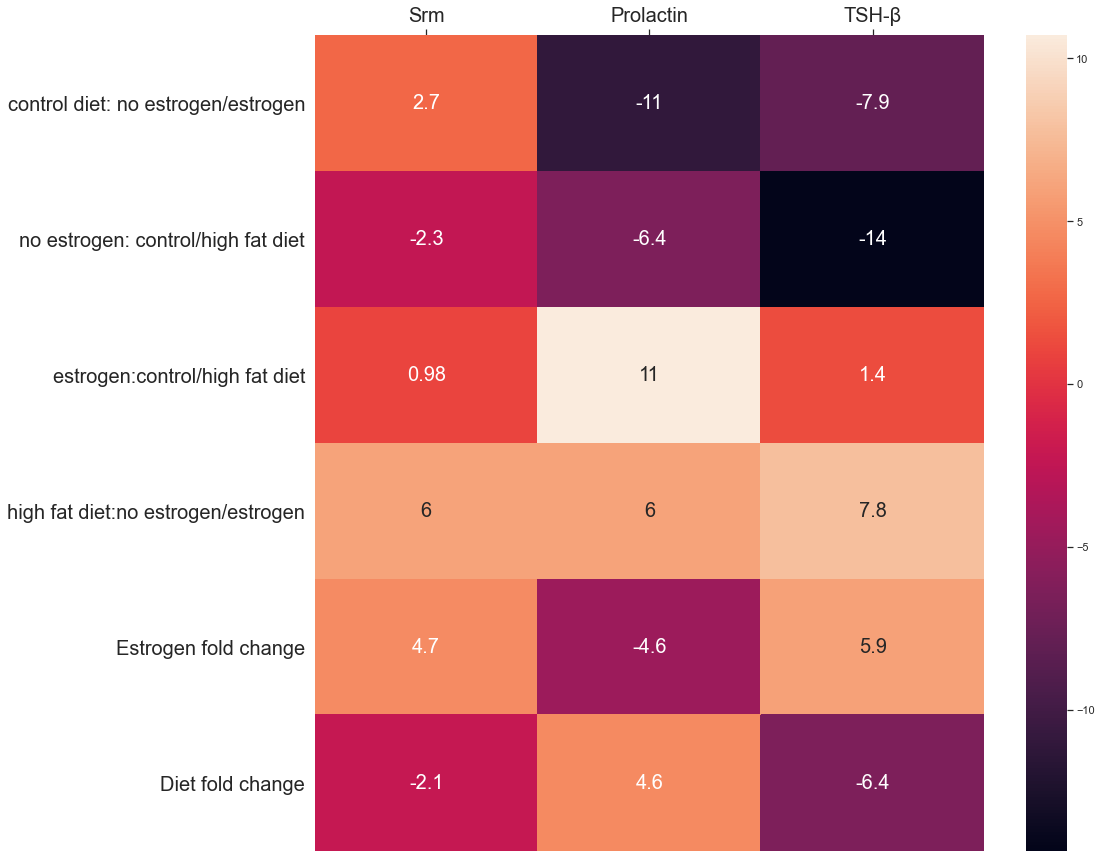

In [11]:
#create new dataframe with the genes you are interested in graphing in the heatmap
#add more (df.index == '<insert_gene_name1>') if needed, interspaced by |
blythespecificgenes=blythelabmulti[(blythelabmulti.index == 'Srm') | (blythelabmulti.index == 'Prl') 
       | (blythelabmulti.index == 'Tshb')]

#Combines absolute values from each column into a new column containing the total fold change of each gene
absolute_fold_change = blythelabmulti["H.log2(c.ovx/c.ove)"] + blythelabmulti["H.log2(c.ovx/h.ovx)"]+blythelabmulti["H.log2(c.ovx/h.ove)"]+blythelabmulti["H.log2(c.ove/h.ovx)"]+blythelabmulti["H.log2(c.ove/h.ove)"]+blythelabmulti['H.log2(h.ovx/h.ove)']
blythespecificgenes['absolute_fold_change'] = absolute_fold_change

#Sorts the dataset by total fold change in descending order
blythespecificgenes_sorted_by_change = blythespecificgenes.sort_values('absolute_fold_change', ascending = False)

#drop columns that we don't need to graph
j = blythespecificgenes_sorted_by_change.drop('absolute_fold_change', 1)
j = j.drop('name', 1)
j = j.drop('E.H.ppde', 1)
j = j.drop('D.H.ppde', 1)
j = j.drop('H.log2(c.ovx/h.ove)', 1)
j = j.drop('H.log2(c.ove/h.ovx)', 1)

plt.figure(figsize = (15,15))

#fill in the labels for the x ticks with the genes you want to graph
#add more '<insert_gene_name>' interspaced with commas between each gene as needed

ax=sns.heatmap(j.T,annot=True,annot_kws={"size": 20},xticklabels=['Srm','Prolactin','TSH-β'],
               yticklabels=['control diet: no estrogen/estrogen',
           'no estrogen: control/high fat diet',
          'estrogen:control/high fat diet',
          'high fat diet:no estrogen/estrogen',
          'Estrogen fold change',
          'Diet fold change'])
ax.xaxis.tick_top()
plt.xticks(size=20)        
plt.yticks(size = 20)

#Makes y-axis labels horizontal
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
plt.savefig('blythe_heatmap.png',bbox_inches = 'tight')


## This is a heatmap showing the log2 fold-change across all levels for the genes Srm, Prolactin, and TSH-β. Darker colors indicate a more negative fold-change, and lighter colors indicate a more positive fold-change. Values in the box give the actual fold-change for that interaction.

# Hmm... What is your data telling you? Where do you think you should look next?

# Listen to your data and the picture it paints and let it guide you in your research!

# Great job on conducting your data analysis of your genes! Good luck on your endeavors!